# K-Means Clusting von 200 einfachen Kundendaten zu Geschlecht, Alter, Einkommen und Spendenfreundlichkeit.

Mohamed Shaad, Data Scientist and Machine Learning Engineer bei B2B Marketing. https://github.com/shaadclt/Customer-Segmentation-KMeansClustering, MIT Licence.

Zuerst das Skript von Mohamed, dann Erweiterungen für das Seminar in raw formatierten Zellen 


Die Erweiterungen nach dem Originalnotebook wurden von ChatGPT und GPT-4o unterstützt.

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

# Loading data and Analysis

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")


In [ ]:
customer_data.head()

In [ ]:
customer_data.shape

In [ ]:
customer_data.info()

In [ ]:
customer_data.isnull().sum()

In [5]:

new_df = pd.DataFrame({
    'CustomerID': [201],
    'Gender': ['Male'],
    'Age': [10],
    'Annual Income (k$)': [200],
    'Spending Score (1-100)': [98]
})
customer_data = pd.concat([customer_data, new_df], ignore_index=True)


In [6]:
X = customer_data.iloc[:,[3,4]].values
X[:11]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]], dtype=int64)

# K-Means Clustering Model

## Choosing the  optimum number of Clusters

### Finding Within-Cluster Sum of Squares (WCSS) value for different number of clusters

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

### Plotting elbow graph

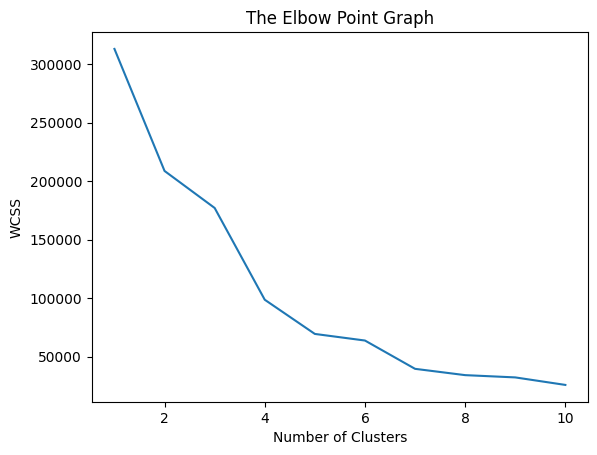

In [8]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Optimum Number of clusters from the elbow plot = 5 

## Training the K-Means Clustering model with 5 clusters

In [9]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [10]:
y = kmeans.fit_predict(X)
print(y)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 1 1]


# Visualizing all the clusters

## Plotting all clusters and their centroid

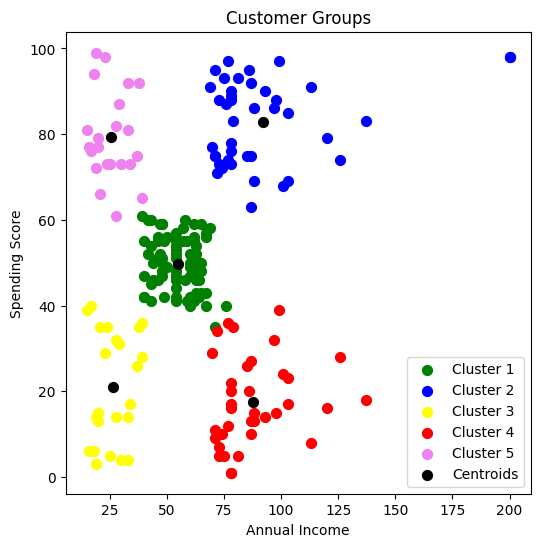

In [11]:
# Plotting all the clusters
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='violet', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


=== Feature-Kombi 1: ['Annual Income (k$)', 'Spending Score (1-100)'] ===


C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


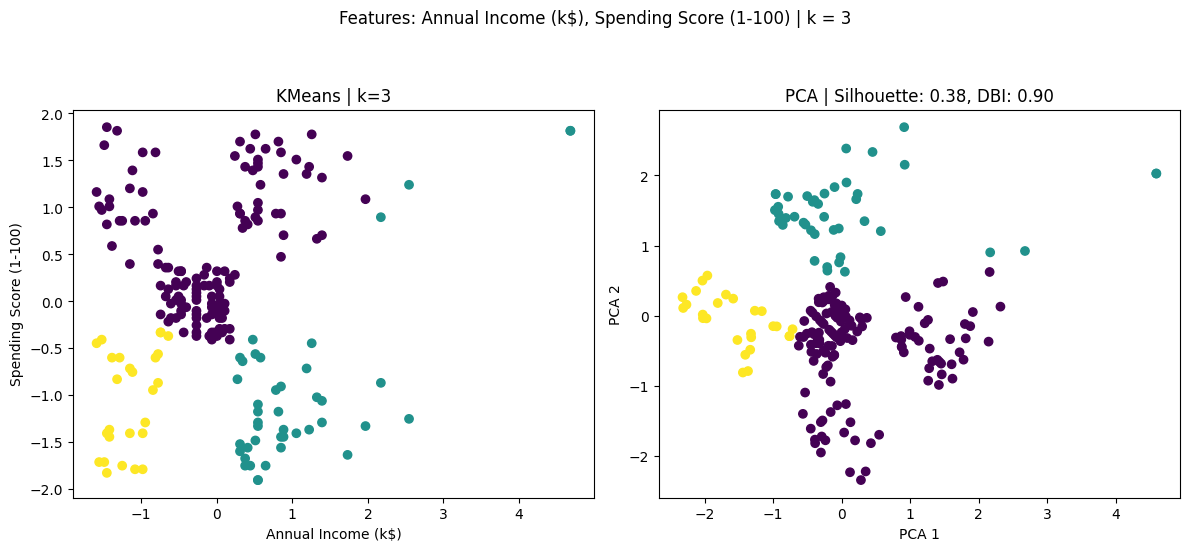

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


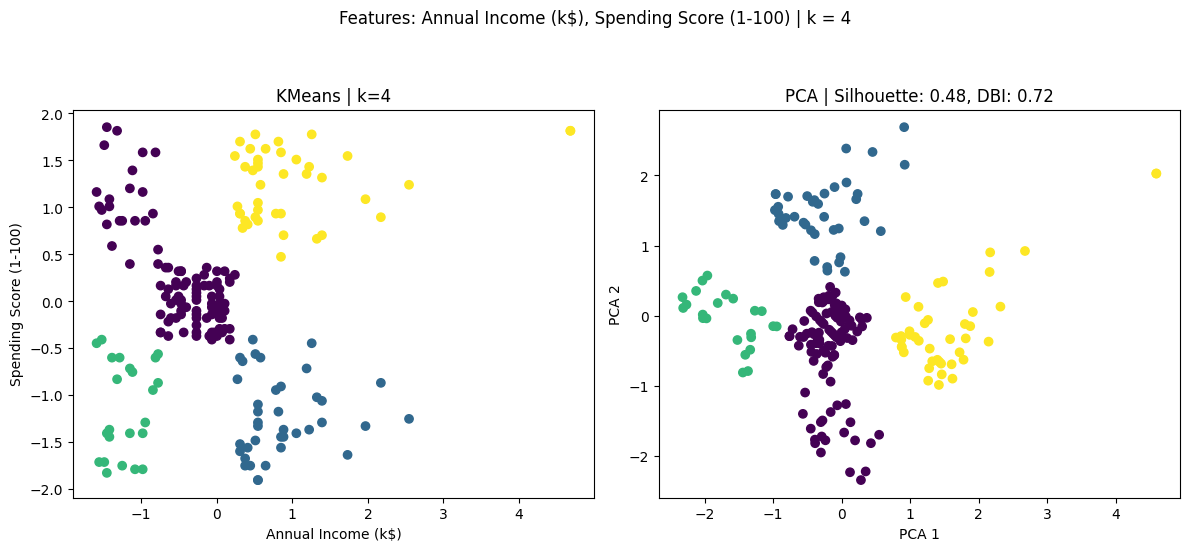

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


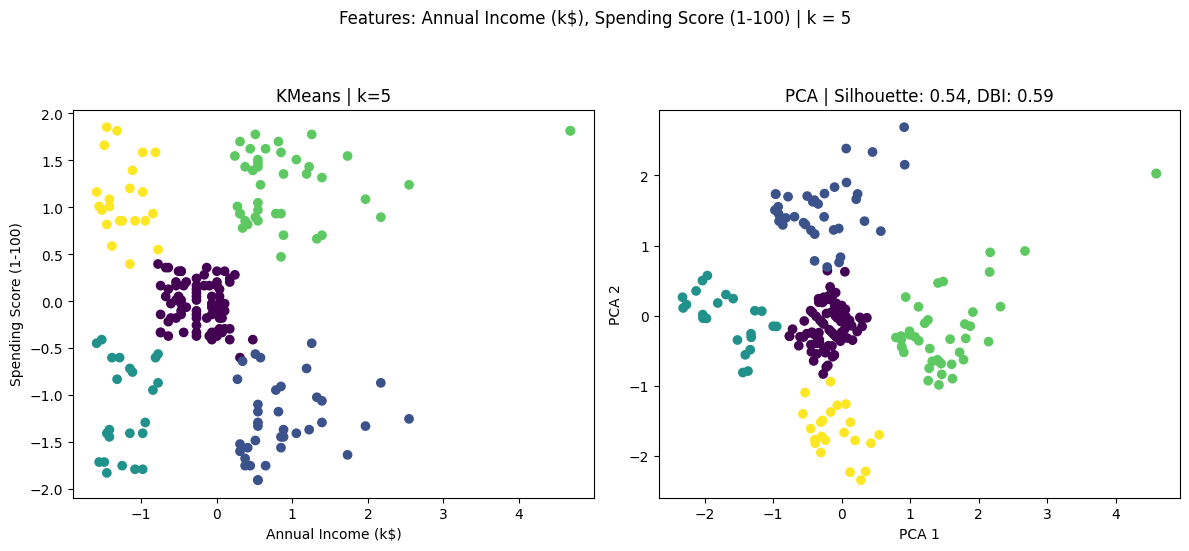

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


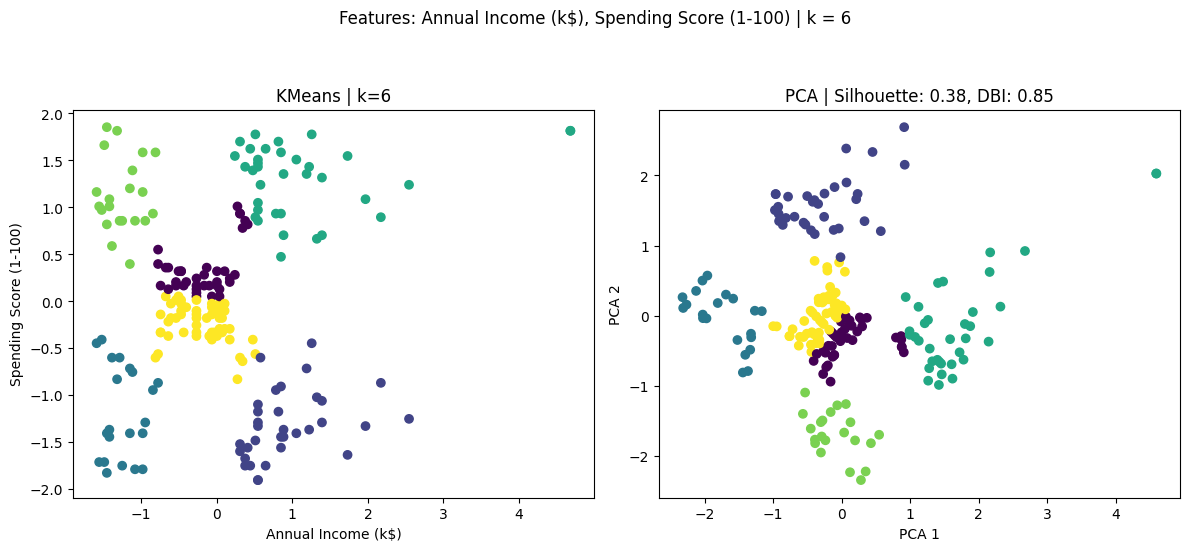


=== Feature-Kombi 2: ['Age', 'Spending Score (1-100)'] ===


C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


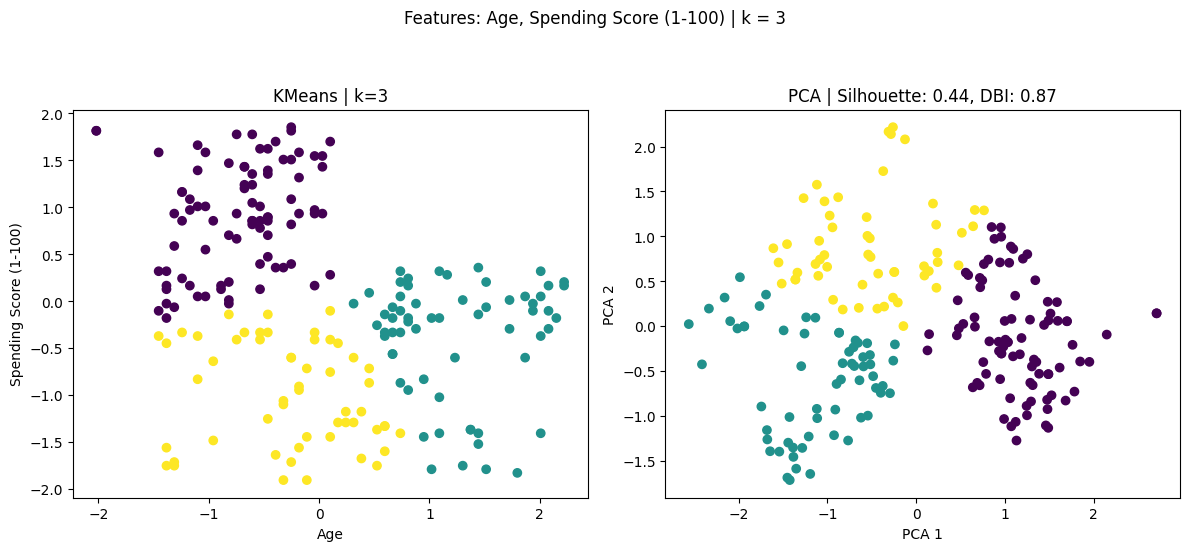

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


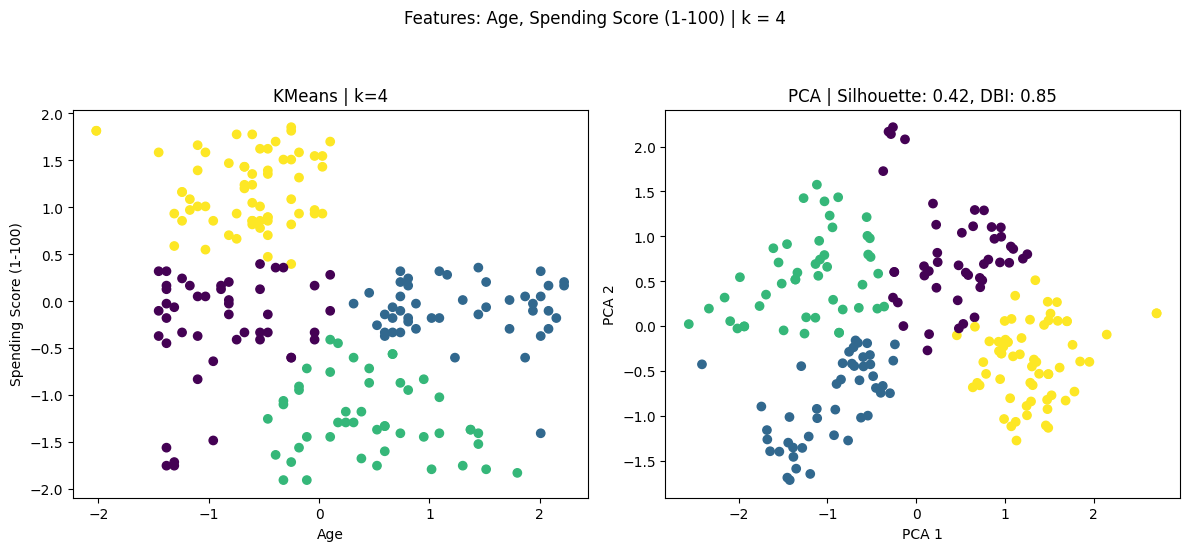

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


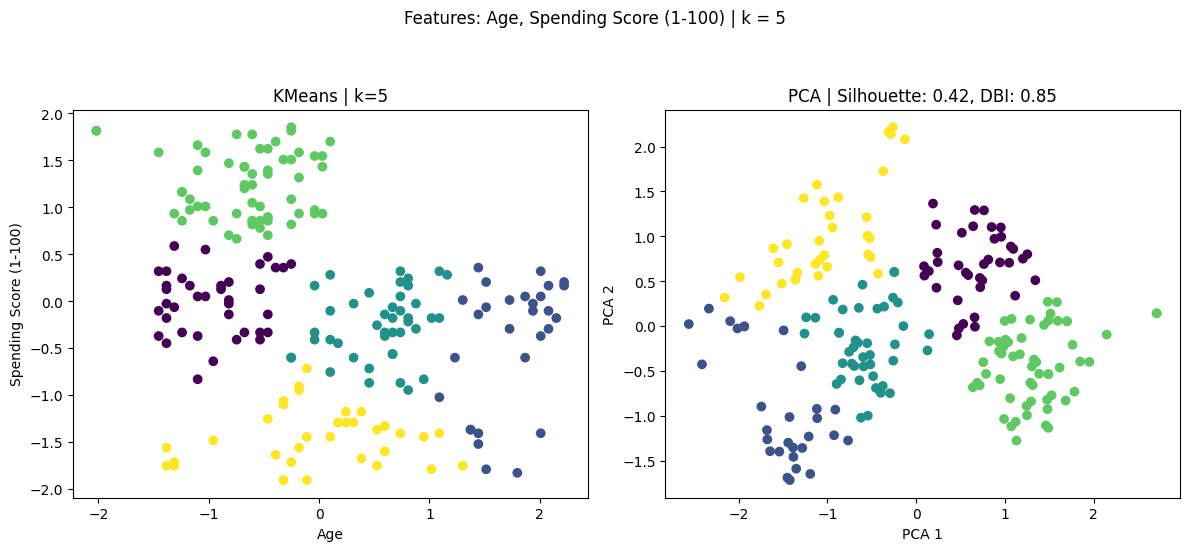

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


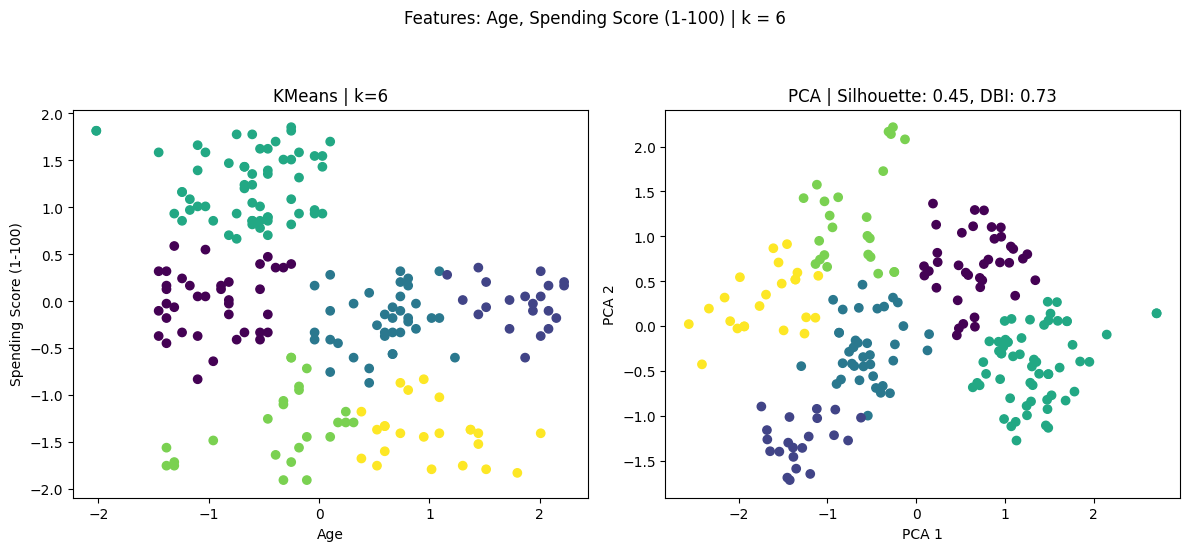


=== Feature-Kombi 3: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] ===


C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


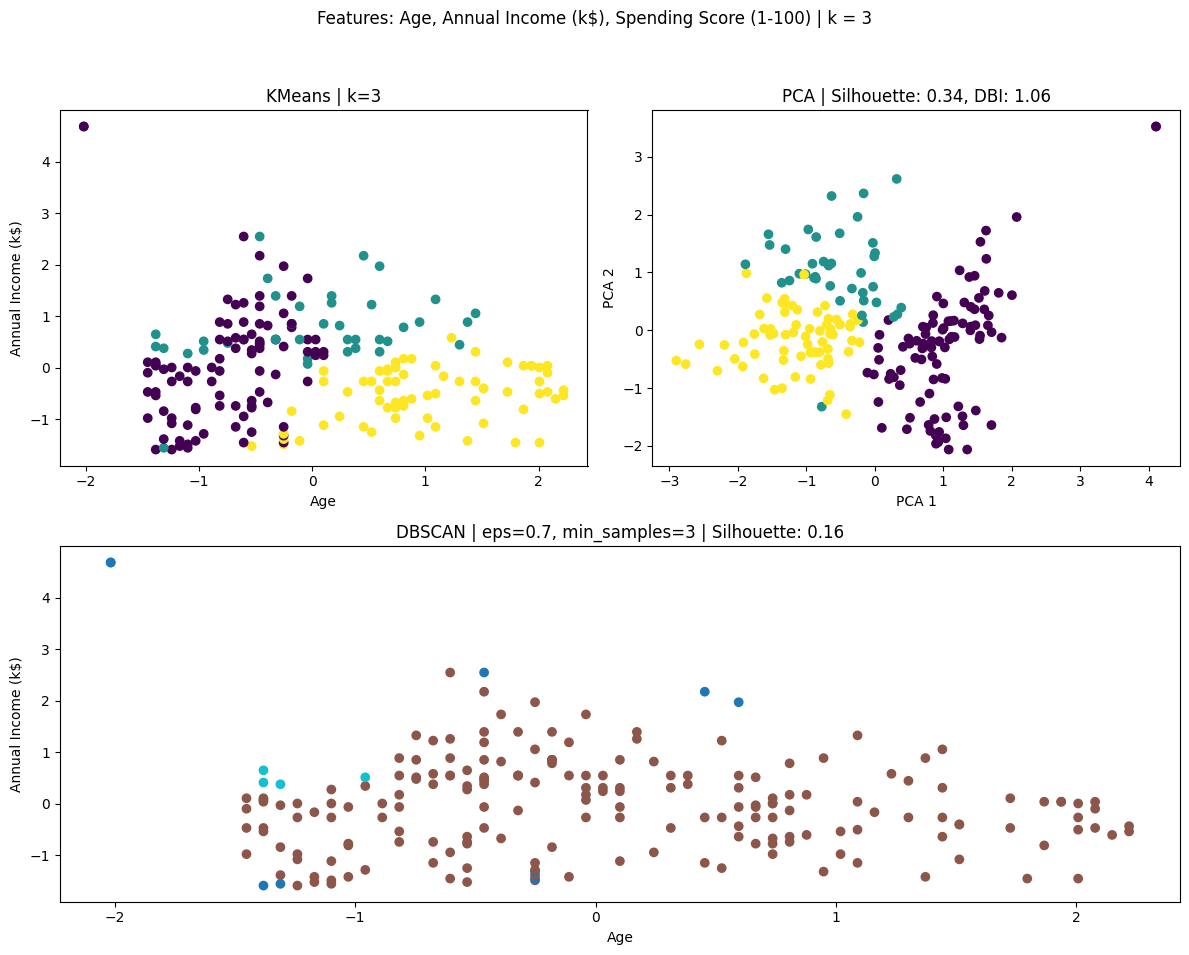

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


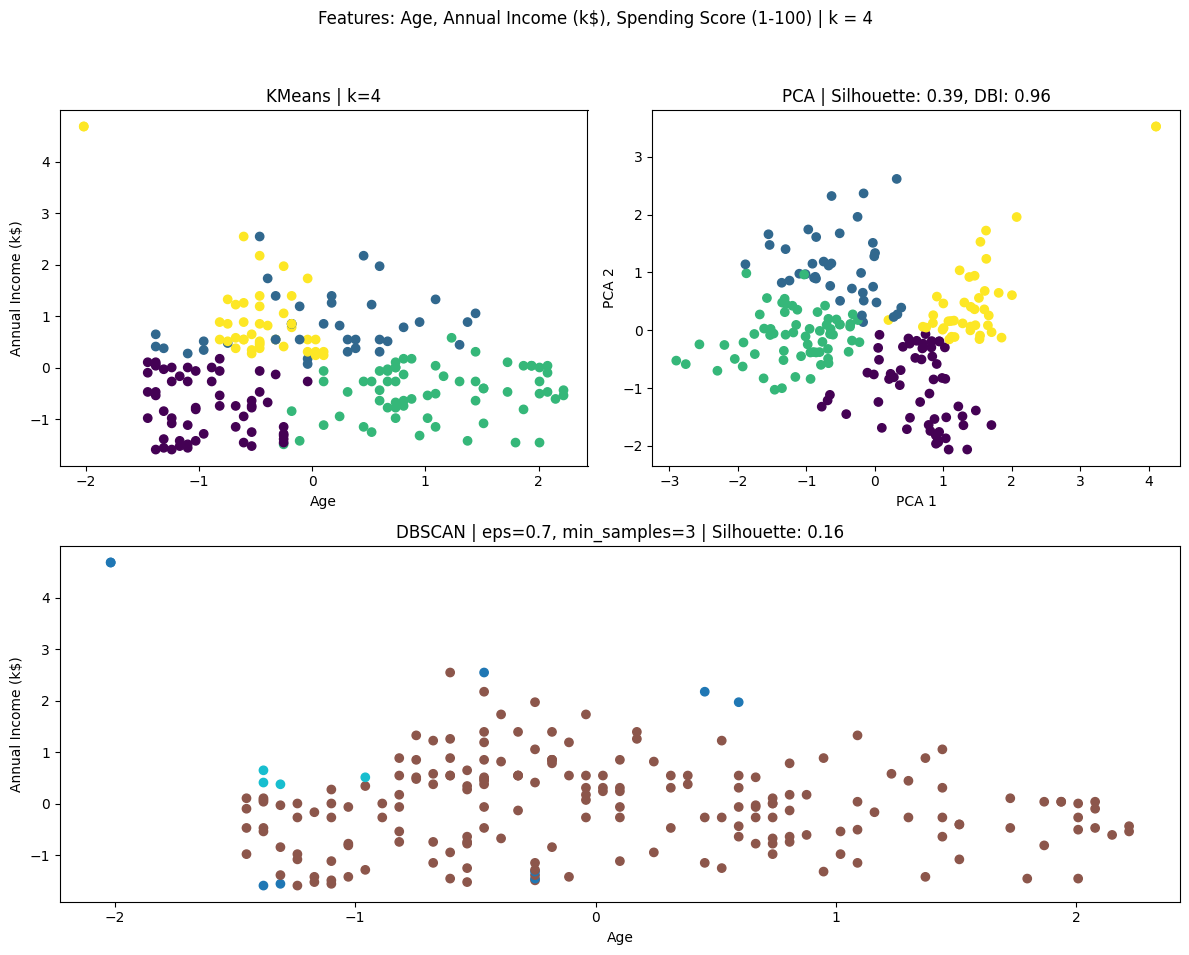

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


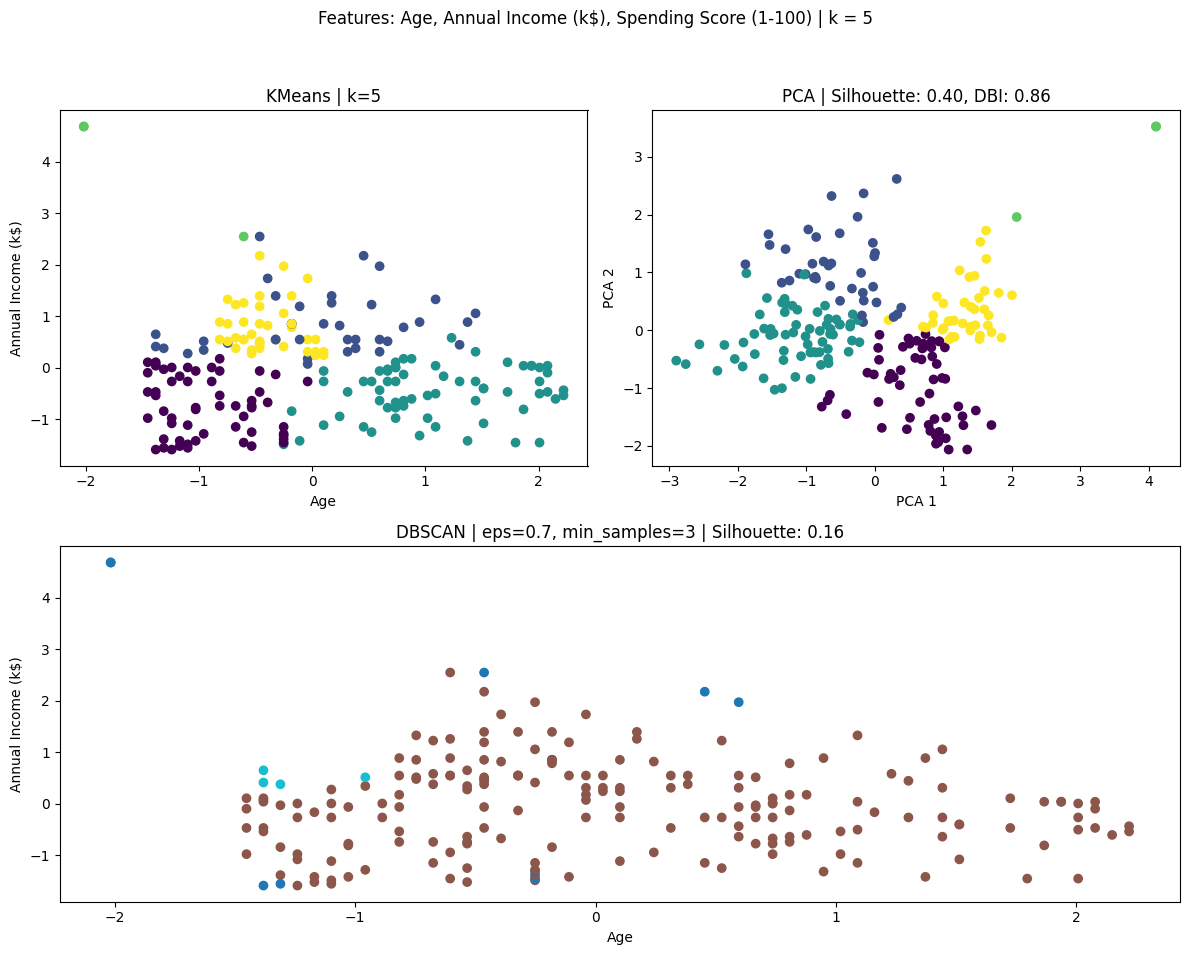

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


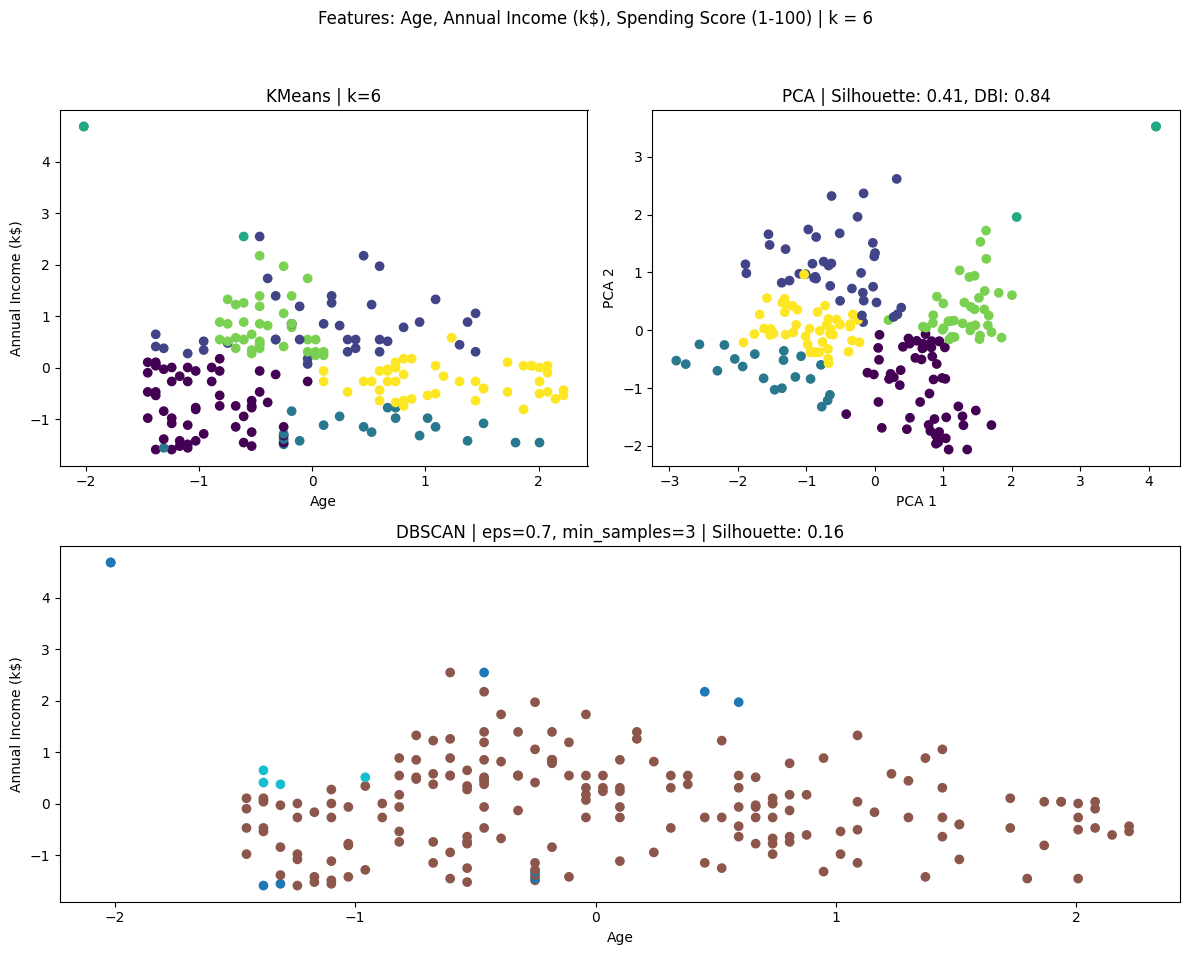


=== Feature-Kombi 4: ['Gender_Numeric', 'Annual Income (k$)', 'Spending Score (1-100)'] ===


C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


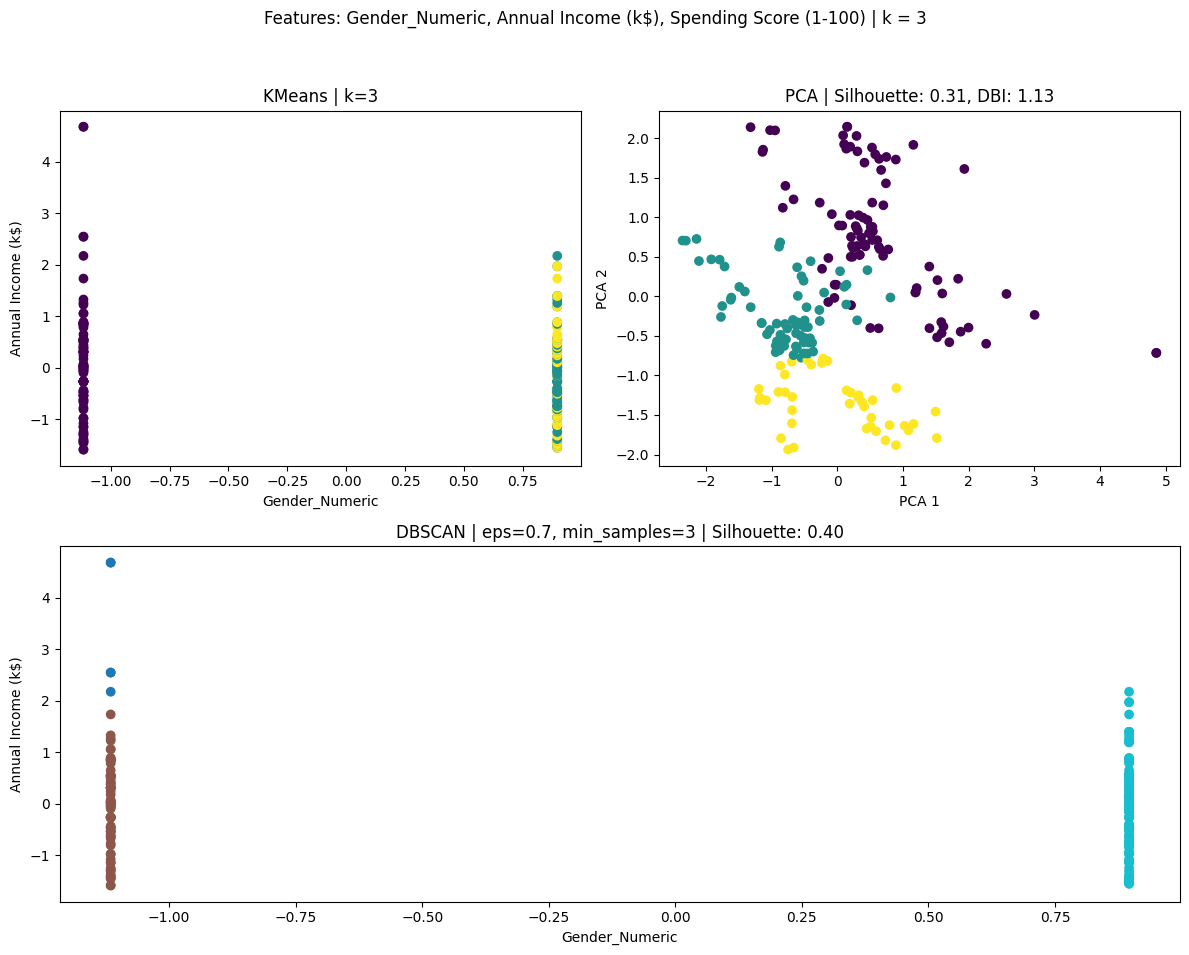

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


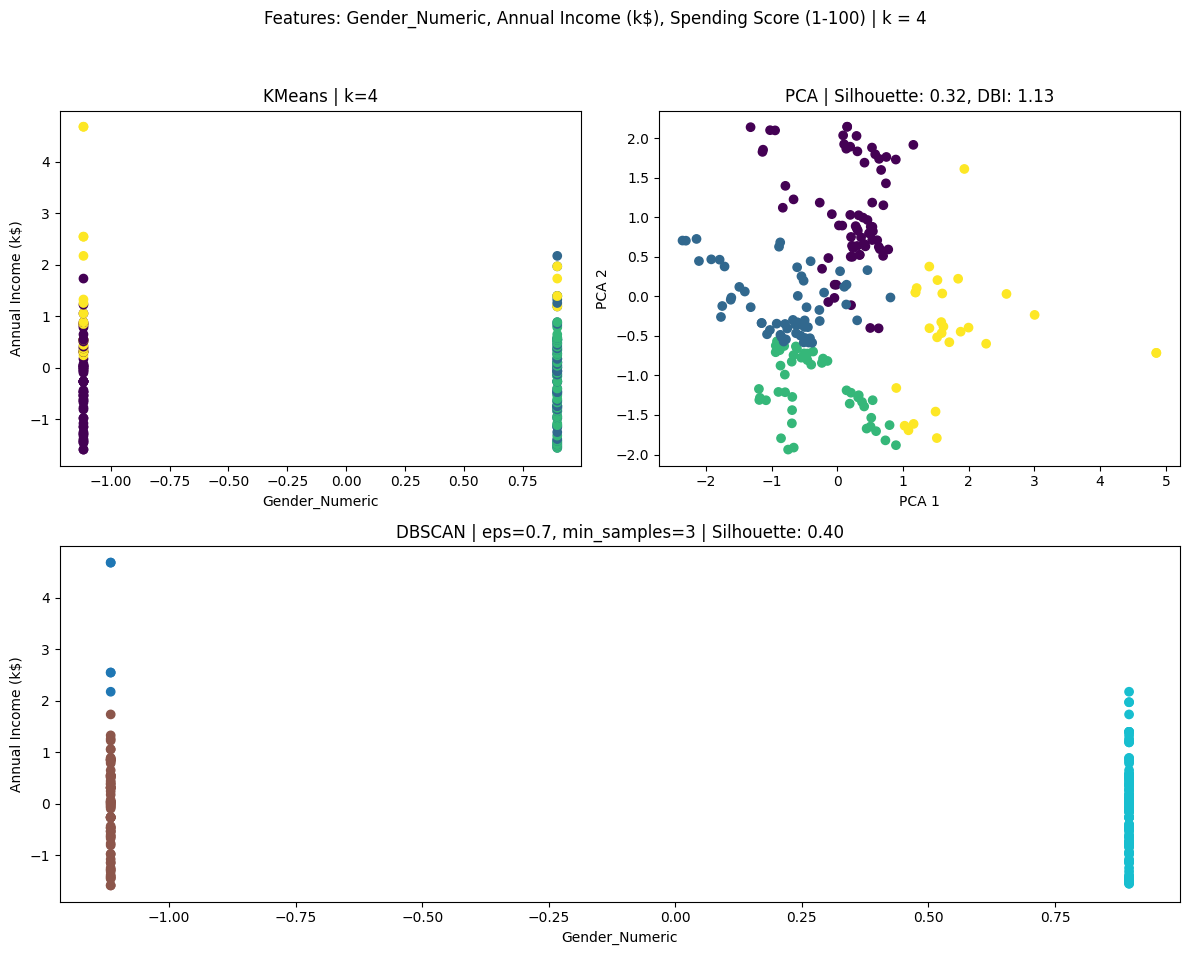

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


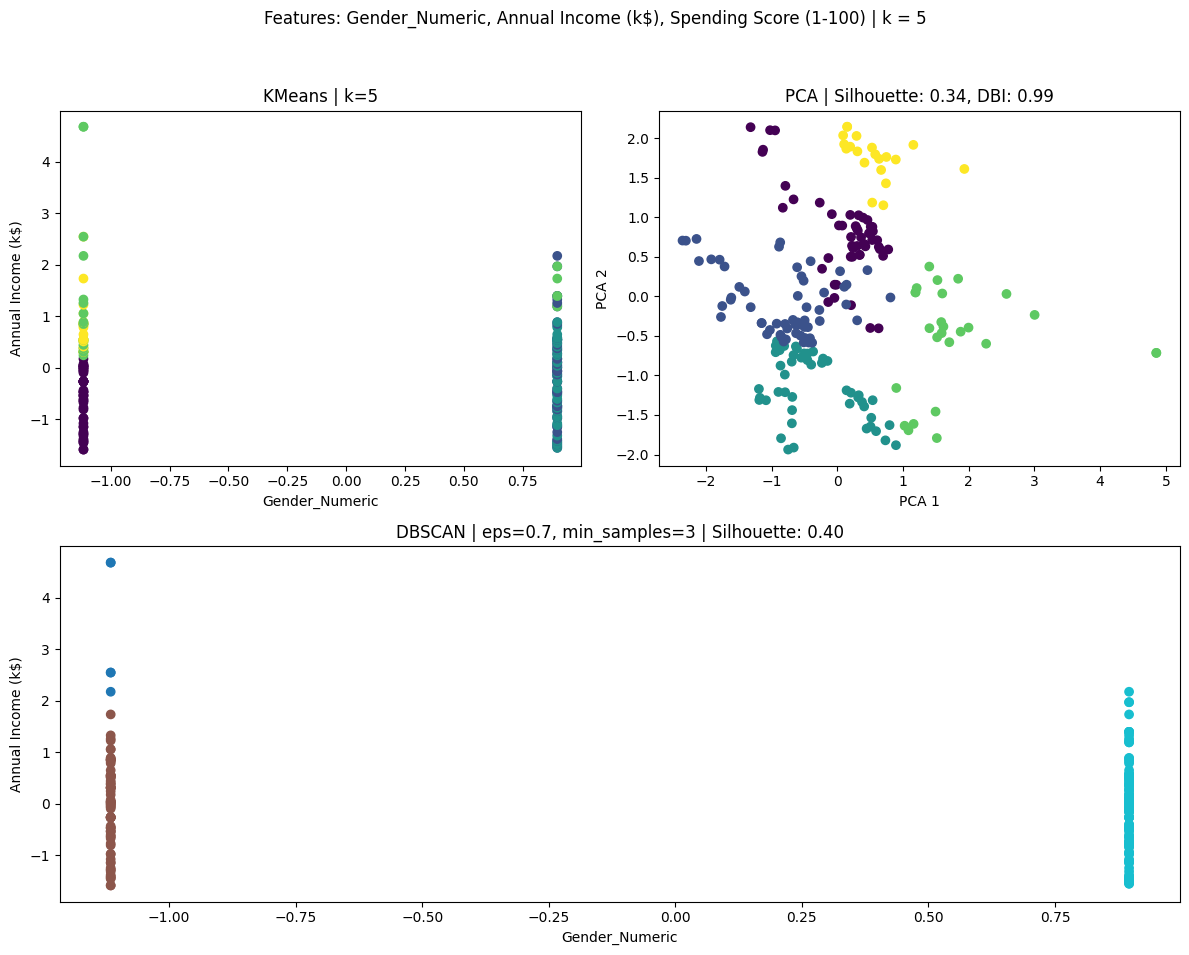

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


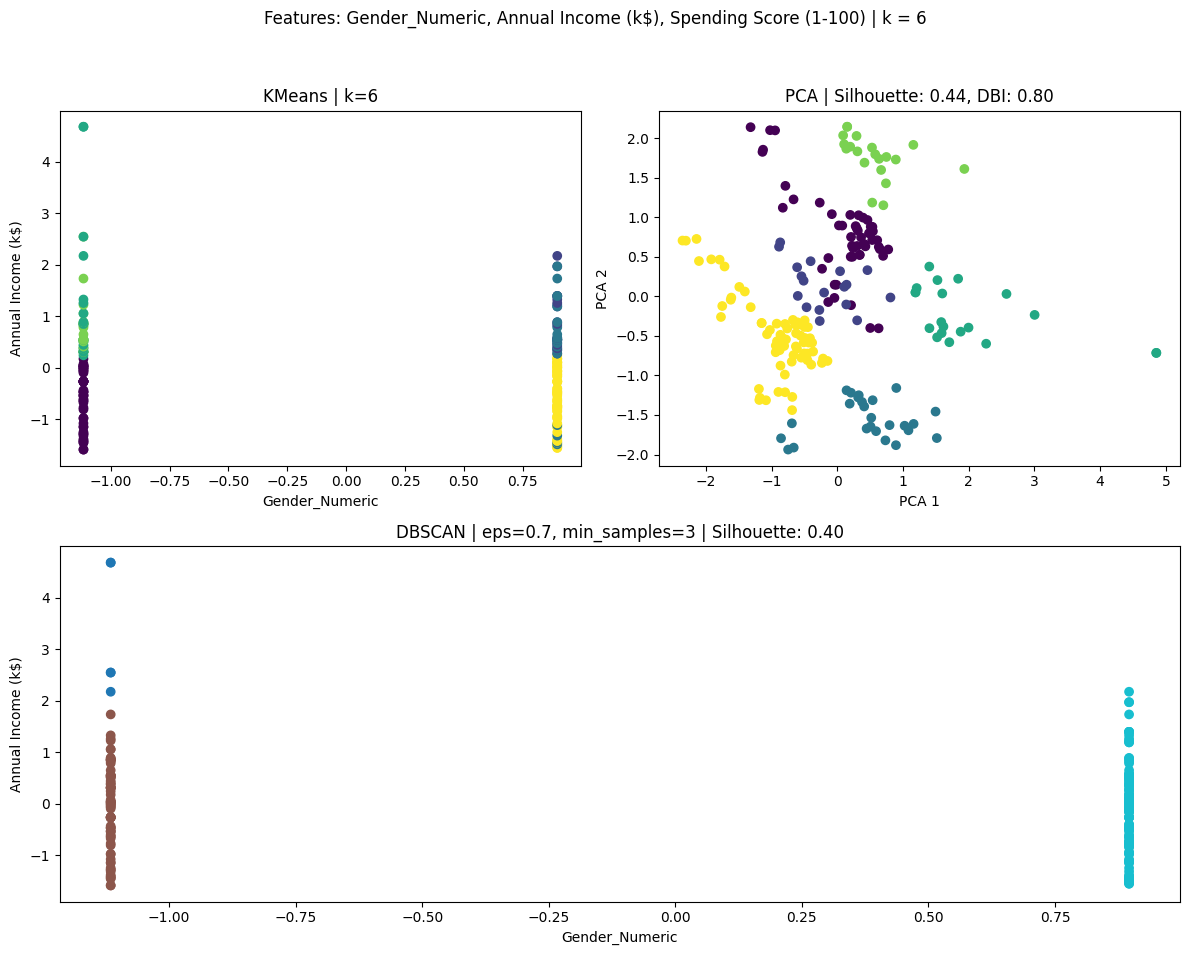


=== Feature-Kombi 5: ['Gender_Numeric', 'Age', 'Spending Score (1-100)'] ===


C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


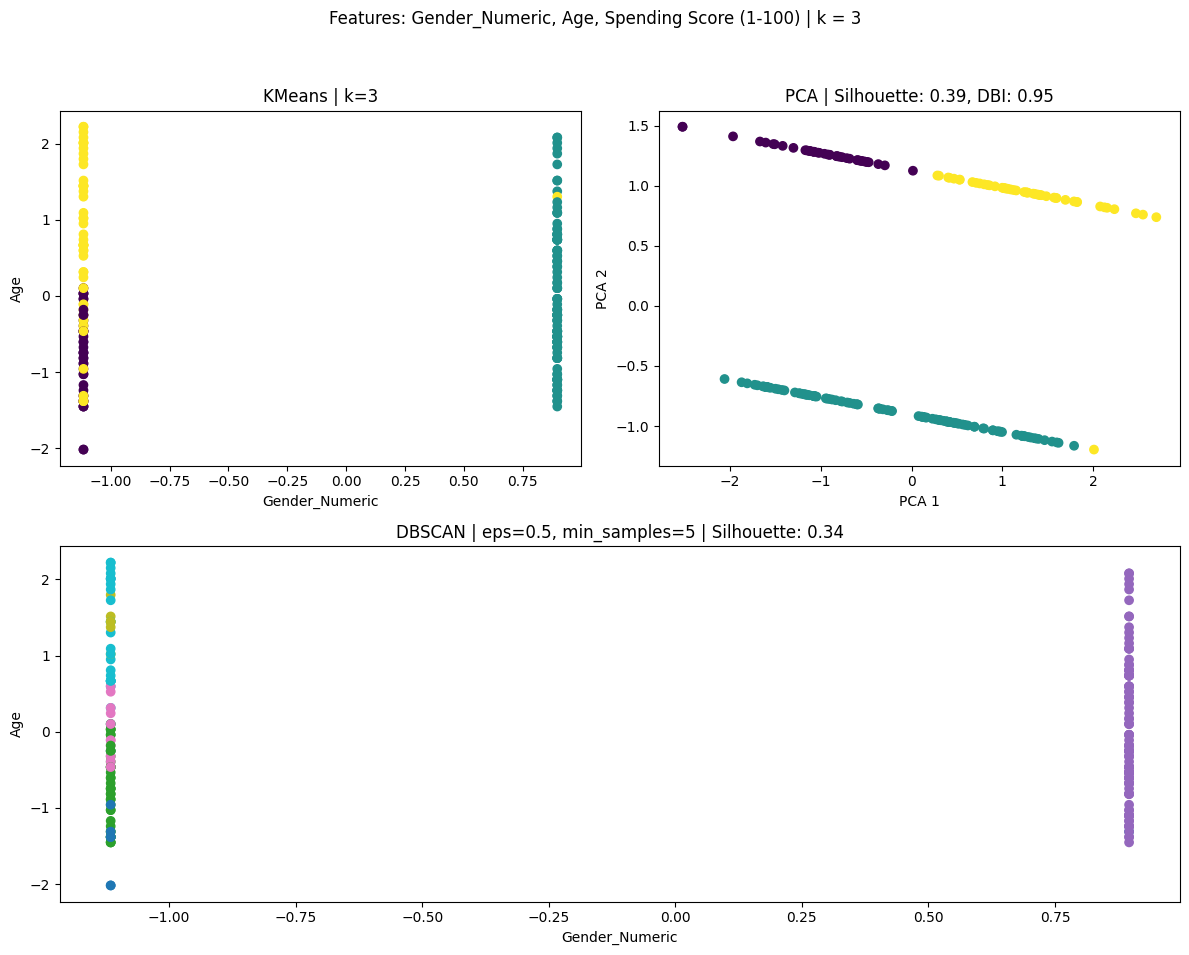

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


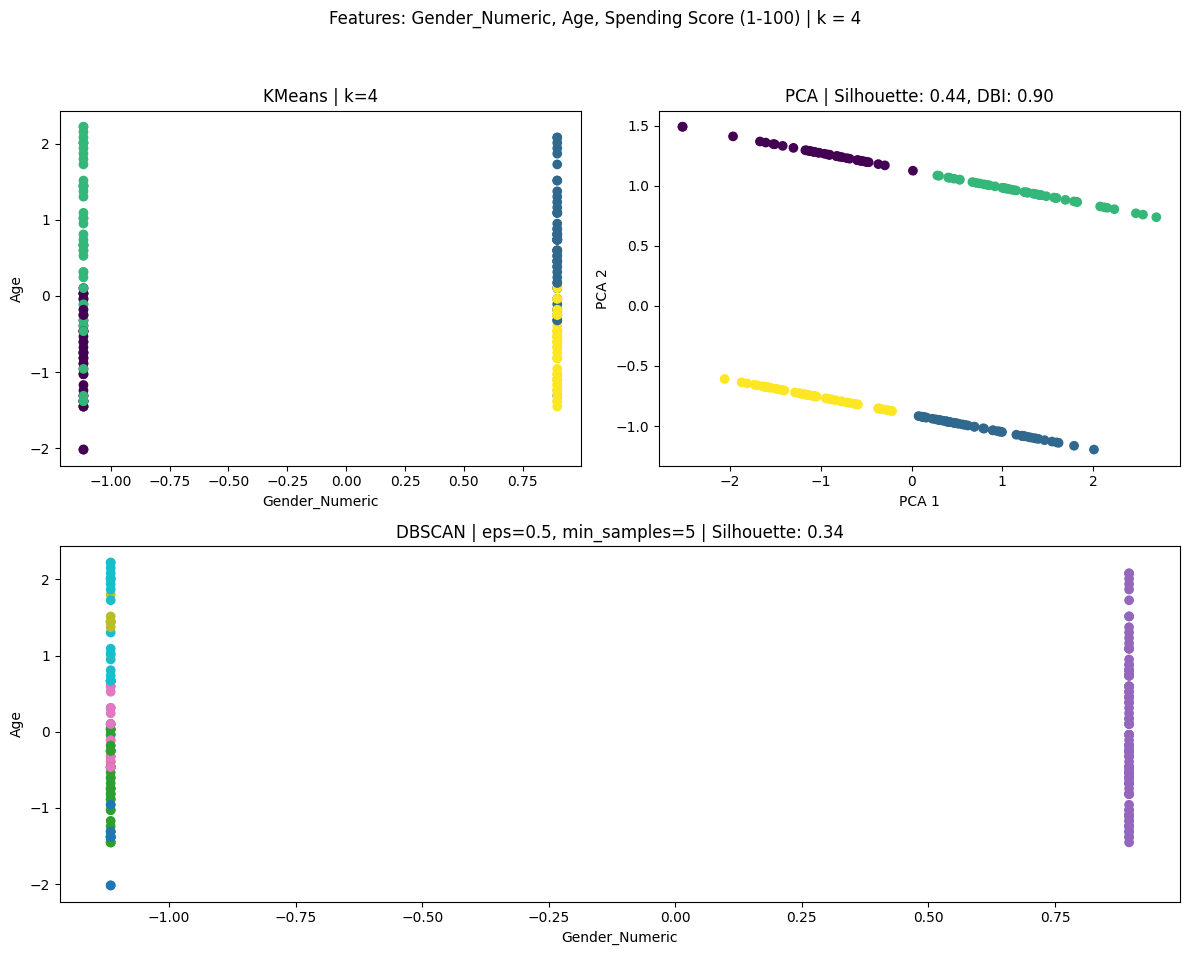

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


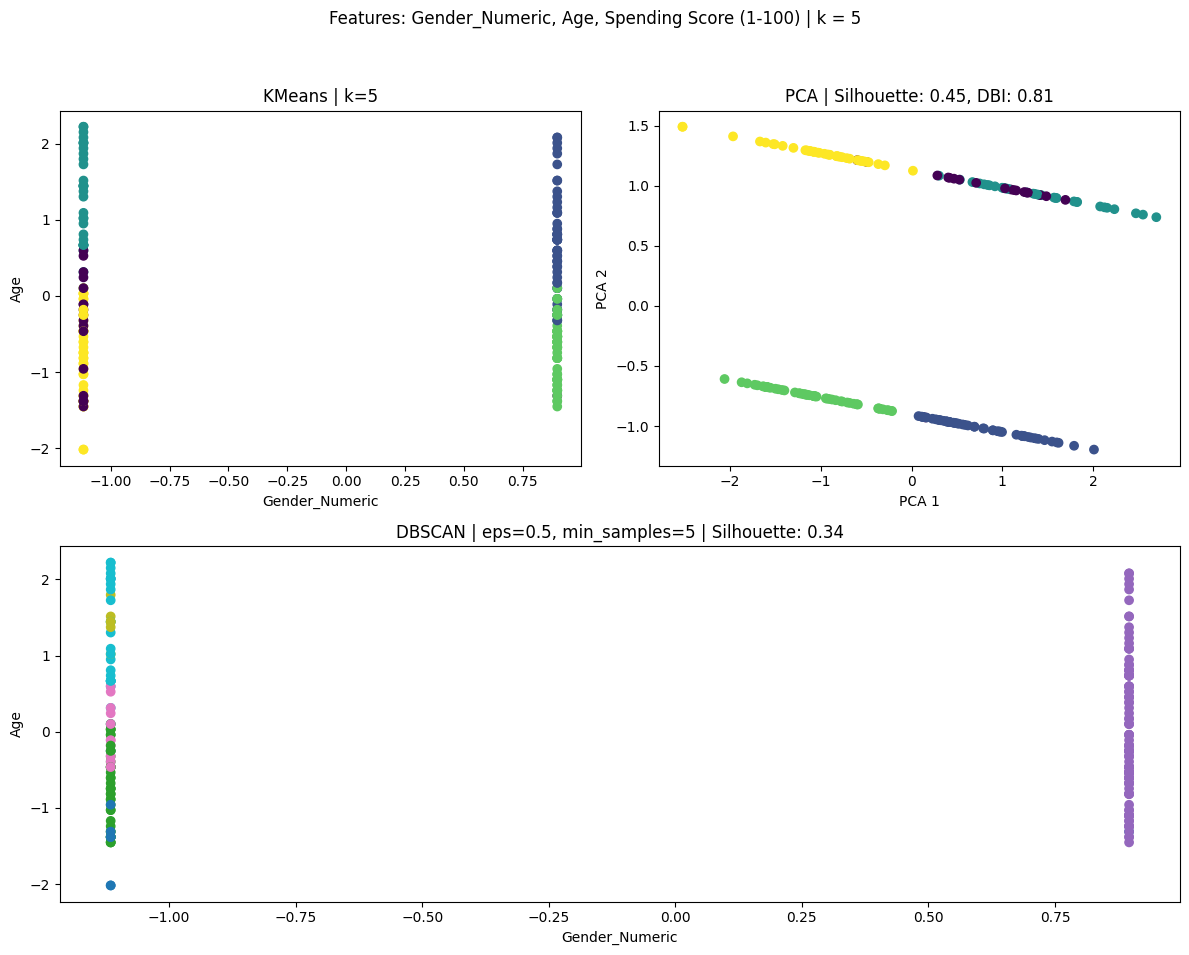

C:\Users\noname\AppData\Local\Temp\ipykernel_17420\748738941.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


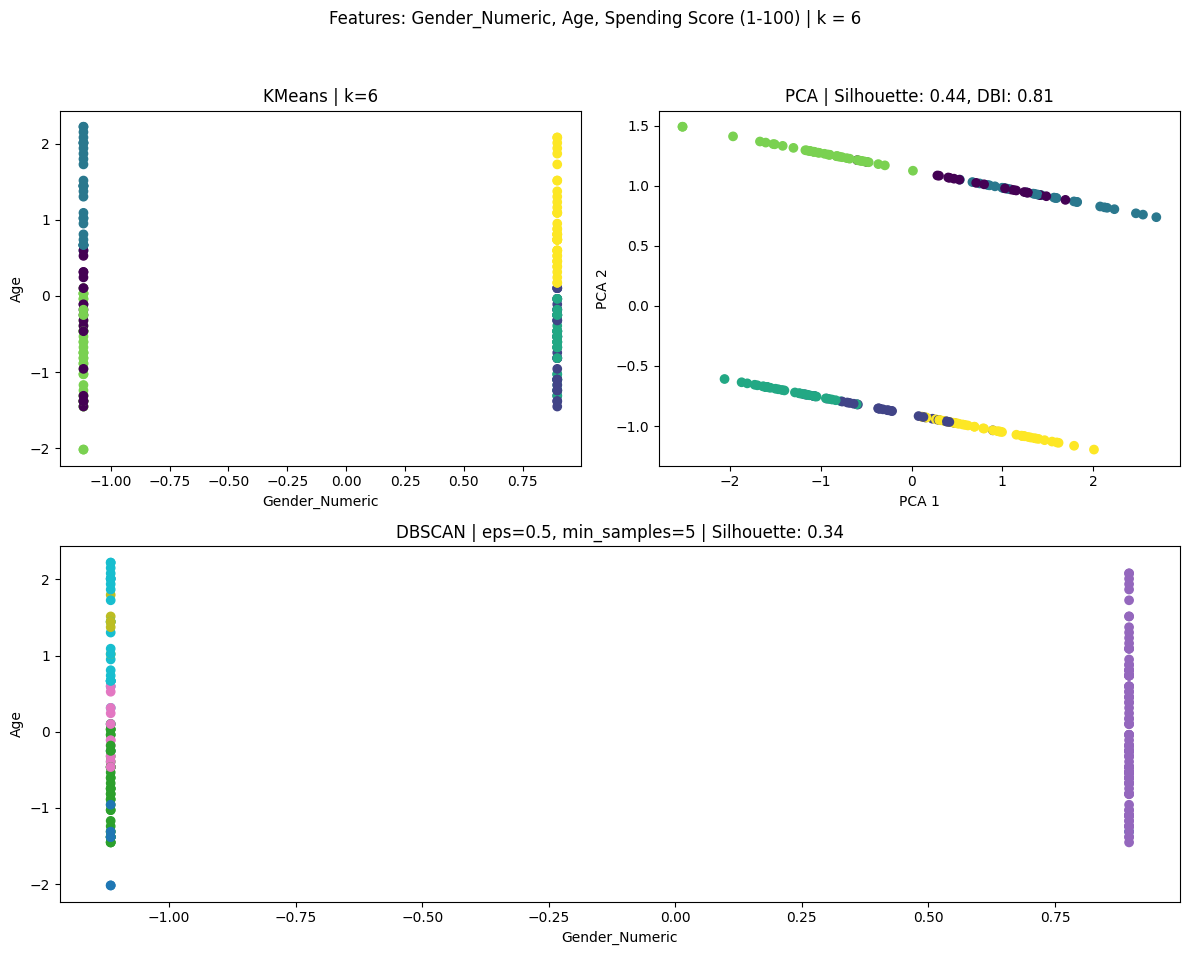


=== Bewertungsübersicht ===


,Features,k,Silhouette Score,Davies-Bouldin Index,DBSCAN Params
2,"Annual Income (k$), Spending Score (1-100)",5,0.537033,0.592235,-
1,"Annual Income (k$), Spending Score (1-100)",4,0.483451,0.72476,-
28,"Gender_Numeric, Age, Spending Score (1-100)",5,0.453638,0.810706,-
7,"Age, Spending Score (1-100)",6,0.448600,0.728172,-
26,"Gender_Numeric, Age, Spending Score (1-100)",4,0.443111,0.899056,-
22,"Gender_Numeric, Annual Income (k$), Spending S...",6,0.440773,0.795097,-
30,"Gender_Numeric, Age, Spending Score (1-100)",6,0.438720,0.806061,-
4,"Age, Spending Score (1-100)",3,0.436823,0.873985,-
5,"Age, Spending Score (1-100)",4,0.422696,0.853079,-
6,"Age, Spending Score (1-100)",5,0.415497,0.852449,-


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from itertools import product
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# === Daten vorbereiten ===
# customer_data sollte vorher geladen sein
customer_data['Gender_Numeric'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

# === Feature-Kombinationen ===
feature_combinations = [
    ['Annual Income (k$)', 'Spending Score (1-100)'],
    ['Age', 'Spending Score (1-100)'],
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    ['Gender_Numeric', 'Annual Income (k$)', 'Spending Score (1-100)'],
    ['Gender_Numeric', 'Age', 'Spending Score (1-100)']
]

# === KMeans Cluster-Anzahlen ===
k_values = [3, 4, 5, 6]

# === Ergebnisse sammeln ===
results = []

# === Hauptschleifen ===
for i, features in enumerate(feature_combinations, 1):
    print(f"\n=== Feature-Kombi {i}: {features} ===")

    X = customer_data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)

        # Bewertung KMeans
        sil_score = silhouette_score(X_scaled, labels)
        db_score = davies_bouldin_score(X_scaled, labels)

        results.append({
            'Features': ', '.join(features),
            'k': k,
            'Silhouette Score': sil_score,
            'Davies-Bouldin Index': db_score,
            'DBSCAN Params': '-'
        })

        # PCA Vorbereitung
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # === Plots ===
        fig = plt.figure(constrained_layout=True, figsize=(12, 10))
        gs = gridspec.GridSpec(2, 2, figure=fig)

        # --- KMeans Plot ---
        ax_kmeans = fig.add_subplot(gs[0, 0])
        if X_scaled.shape[1] >= 2:
            ax_kmeans.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
            ax_kmeans.set_title(f"KMeans | k={k}")
            ax_kmeans.set_xlabel(features[0])
            ax_kmeans.set_ylabel(features[1])
        else:
            ax_kmeans.text(0.5, 0.5, 'Nur 1 Feature', ha='center', va='center')
            ax_kmeans.set_title("KMeans nicht darstellbar")
            ax_kmeans.axis('off')

        # --- PCA Plot ---
        ax_pca = fig.add_subplot(gs[0, 1])
        ax_pca.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
        ax_pca.set_title(f"PCA | Silhouette: {sil_score:.2f}, DBI: {db_score:.2f}")
        ax_pca.set_xlabel("PCA 1")
        ax_pca.set_ylabel("PCA 2")

        # === DBSCAN nur wenn ≥3 Features ===
        if X_scaled.shape[1] >= 3:
            best_dbscan_score = -1
            best_dbscan_labels = None
            best_dbscan_params = None

            for eps, min_samples in product([0.3, 0.5, 0.7], [3, 5, 10]):
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                db_labels = dbscan.fit_predict(X_scaled)

                n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
                if n_clusters >= 2:
                    sil_db = silhouette_score(X_scaled, db_labels)
                    if sil_db > best_dbscan_score:
                        best_dbscan_score = sil_db
                        best_dbscan_labels = db_labels
                        best_dbscan_params = (eps, min_samples)

            # === Plot bester DBSCAN ===
            if best_dbscan_labels is not None:
                ax_dbscan = fig.add_subplot(gs[1, :])
                ax_dbscan.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_dbscan_labels, cmap='tab10')
                eps_best, min_samples_best = best_dbscan_params
                ax_dbscan.set_title(f"DBSCAN | eps={eps_best}, min_samples={min_samples_best} | Silhouette: {best_dbscan_score:.2f}")
                ax_dbscan.set_xlabel(features[0])
                ax_dbscan.set_ylabel(features[1])

                # Ergebnisse speichern
                results.append({
                    'Features': ', '.join(features),
                    'k': 'DBSCAN',
                    'Silhouette Score': best_dbscan_score,
                    'Davies-Bouldin Index': '-',
                    'DBSCAN Params': f"eps={eps_best}, min_samples={min_samples_best}"
                })

        fig.suptitle(f"Features: {', '.join(features)} | k = {k}", fontsize=12)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# === Ergebnisse anzeigen ===
results_df = pd.DataFrame(results)
print("\n=== Bewertungsübersicht ===")
display(results_df.sort_values(by="Silhouette Score", ascending=False))